# Python Programming: Quantile Regression

As we have seen, linear regression models make a key assumption about the random error term in the linear model. The assumption is that the error term has a constant variance across the values of independent variable X. However, when the assumption is no longer true, we use quantile regression. The following example will help us understand how we can use quantile regression while working on such a problem.

## Example: Quantile Regression

In [1]:
# Importing the required libraries
# 
import numpy as np 
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Data with constant variance')

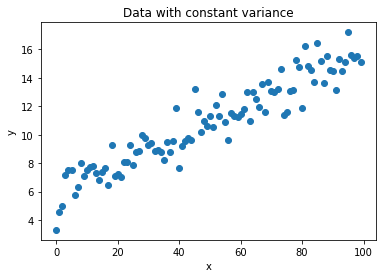

In [2]:
## Generating some data with constant variance /noise
# This is the assumption of linear regression
# 
x = np.arange(100).reshape(100,1)
intercept_ = 6
slope_ = 0.1

## non constant error
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = 1)

## Regression equation
y = intercept_ + slope_ * x + error_

plt.figure(1)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with constant variance")

# When we move from left to right along the x-axis, 
# we won’t see a lot of variation in the values of y. 
# An linear regression would be the ideal candidate 
# here to model the data.

In [3]:
## Creating a linear regression model regression on the above dataset
#
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(x, y)

y_pred1 = model1.predict(x)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x, y)))


Mean squared error: 1.02
Variance score: 0.89


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


Text(0.5, 1.0, 'Linear regression')

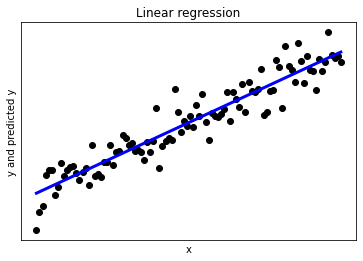

In [4]:
## Plotting the regression
plt.figure(2)
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred1, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression")

# This will lead to us having modeled our data well on our dataset.
# Our variance score of 0.88 is close to 1 which usually is when
# we model our data perfectly. 
# NB: our variance score will vary based on the randomly generated values above

Text(0.5, 1.0, 'Data with non-constant variance')

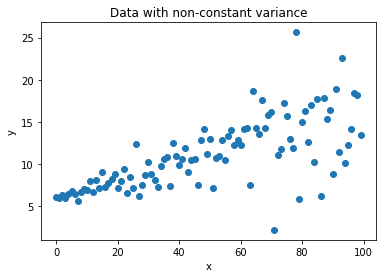

In [5]:
## Now let get to work with some data that violates 
# our linear regression assumption. This means first 
# adding some noise to our dataset. 
# We will first generating some data with non-constant variance
# 
x_ = np.arange(100).reshape(100,1)
intercept_ = 6
slope_ = 0.1

## Non constant variance
var_ = 0.1 + 0.05 * x_

## non constant error
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = var_)

## Linear egression equation
y_ = intercept_ + slope_ * x + error_

plt.figure(3)
plt.scatter(x_, y_)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with non-constant variance")

# From our graph, we will get to see that a phenomenon
# where the variability of y is unequal across the range 
# of values of x is called as Heteroscedasticity. 
# As it will be seen in the plot it takes the shape of a cone. 
# The y variable widens as the value of x increases.

In [6]:
## Let's now trying to fit a linear regression
# 
model2 = LinearRegression(fit_intercept = True, normalize = False)
model2.fit(x_, y_)

y_pred2 = model2.predict(x_)

print
print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred2 - y_) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x_, y_)))

# With a low variance score of 0.51, it means that our linear regression 
# did not do a good job. 

Mean squared error: 9.02
Variance score: 0.48


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


Text(0.5, 1.0, 'Linear regression on data with non-constant variance')

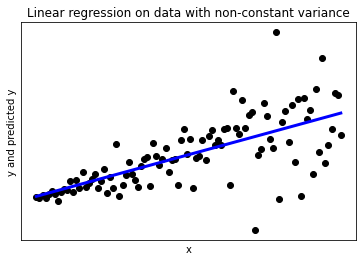

In [7]:
## We can also see this by plotting the regression below
#
plt.figure(4)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression on data with non-constant variance")

# We will get to observe that our line of best fit is far from perfect

In [8]:
## Now implementing quantile regression for the median, 0.5th quantile
#

# We import the required libraries
#  
import pandas as pd 

# We take the data into a pandas dataframe so that 
# its easier for us to work with statsmodel interfaces. 
# Our dataframe data has two columns, ‘x’ and ‘y’
#
data = pd.DataFrame(data = np.hstack([x_, y_]), columns = ["x", "y"])
data.head()

,x,y
0,0.0,6.078980
1,1.0,5.979820
2,2.0,6.259665
3,3.0,5.984354
4,4.0,6.400224


In [9]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 6.0978 and our slope or the coefficient for our x is 0.0976. 
# These are the parameters for the 0.5th quantile of our y. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4071
Model:                       QuantReg   Bandwidth:                       2.185
Method:                 Least Squares   Sparsity:                        5.287
Date:                Sun, 24 Apr 2022   No. Observations:                  100
Time:                        16:18:52   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7694      0.525     10.994      0.000       4.728       6.811
x              0.1155      0.009     12.616      0.000       0.097       0.134


In [10]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   5.947648  0.032171        0.006004        0.058338
1  0.2   5.797765  0.068199        0.045608        0.090791
2  0.3   5.983411  0.080374        0.058557        0.102191
3  0.4   5.883703  0.096495        0.075586        0.117403
4  0.5   5.769439  0.115539        0.097365        0.133713
5  0.6   5.896482  0.125934        0.109920        0.141949
6  0.7   6.078976  0.128388        0.113929        0.142847
7  0.8   6.148853  0.135522        0.121460        0.149584
8  0.9   6.129319  0.150134        0.135620        0.164649


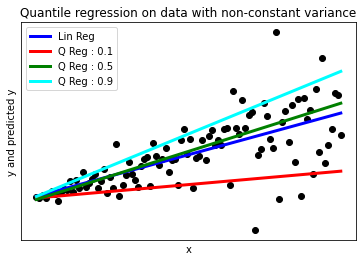

In [11]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.

<Figure size 432x288 with 0 Axes>

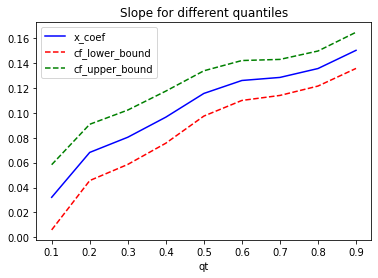

In [12]:
## Plot the changes in the quantile coeffiecients
# 
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

# We would be able to see how the slope value varies for different quantiles. 
# Compared with linear regression which is flat across all the quantiles, 
# Quantile Regression allows us to investigate into the different areas of the data 
# and model them appropriately.

## <font color="green">Challenge 1</font>

In [13]:
# Challenge 1
# ---
# Question: Study the factors that influence total medical expenditures for people with low-, medium-, and high- expenditures.
# ---
# Dataset url = http://bit.ly/QuantileHealthDataset
# ---
# Info:
# Data are from the Medical Expenditure Panel Survey (MEPS)
# Dependent variable: total medical expenditures
# Independent variables: has supplemental insurance, total number of chronic conditions, age, female, and white

url = 'http://bit.ly/QuantileHealthDataset'
df = pd.read_csv(url)
df.head()


,dupersid,totexp,ltotexp,suppins,totchr,age,female,white
0,93193020,3,1.098612,1,0,69,0,1
1,72072017,6,1.791759,1,0,65,1,1
2,25296013,9,2.197225,0,0,85,1,1
3,23628011,14,2.639057,0,0,76,1,1
4,95041014,18,2.890372,0,1,71,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


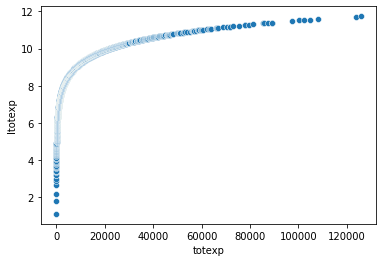

In [14]:
import seaborn as sb
sb.scatterplot(df.totexp,df.ltotexp)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dupersid  2955 non-null   int64  
 1   totexp    2955 non-null   int64  
 2   ltotexp   2955 non-null   float64
 3   suppins   2955 non-null   int64  
 4   totchr    2955 non-null   int64  
 5   age       2955 non-null   int64  
 6   female    2955 non-null   int64  
 7   white     2955 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 184.8 KB


In [24]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile for suppins
#
mod = smf.quantreg("totexp ~ ltotexp + totchr", df)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                 totexp   Pseudo R-squared:               0.3465
Model:                       QuantReg   Bandwidth:                       890.1
Method:                 Least Squares   Sparsity:                        5134.
Date:                Sun, 24 Apr 2022   No. Observations:                 2955
Time:                        17:14:48   Df Residuals:                     2952
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.374e+04    288.395    -82.324      0.000   -2.43e+04   -2.32e+04
ltotexp     3492.0424     38.217     91.374      0.000    3417.108    3566.977
totchr       -64.0078     40.371     -1.585      0.113    -143.167      15.151


In [23]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.25,1,0.25) 
models = []
param = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	param.append([qt, res.params['Intercept'], res.params['ltotexp']] + res.conf_int().loc['ltotexp'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = param, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

     qt     intercept       x_coef  cf_lower_bound  cf_upper_bound
0  0.25 -22647.563772  3235.034909     3214.027362     3256.042455
1  0.50 -23741.945415  3492.042436     3417.107640     3566.977231
2  0.75 -28031.347544  4446.606579     4075.006662     4818.206495


In [ ]:
## Let's now trying to fit a linear regression
# 
model2 = LinearRegression(fit_intercept = True, normalize = False)
x_ = df.totexp.values.reshape(-1, 1)
y_ = df.ltotexp.values.reshape(-1, 1)
model2.fit(x_, y_)

y_pred2 = model2.predict(x_)

print
print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred2 - y_) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x_, y_)))

# With a low variance score of 0.51, it means that our linear regression 
# did not do a good job. 

Mean squared error: 0.93
Variance score: -1034202.69


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


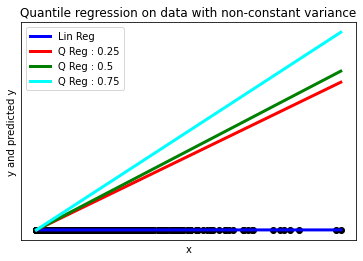

In [ ]:
## Let us now plot 0.25th, 0.5th and 0.75th quantile models against our original data.
plt.figure(5)
plt.scatter(x_,y_, color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['ltotexp'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.25')

y_pred4 = models[1].params['Intercept'] + models[1].params['ltotexp'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[2].params['Intercept'] + models[2].params['ltotexp'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.75')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.

## <font color="green">Challenge 2

In [ ]:
# Challenge 2
# ---
# Question: Given the household income data, determine the effect of predictor variables on the independent variable.
# ---
# Dataset source = http://bit.ly/USHouseholdDataset
# ---
# 
OUR CODE GOES HERE

## <font color="green">Challenge 3</font>

In [ ]:
# Challenge 3
# ---
# Question: Create a regression model on the following dataset.
# ---
# Dataset url = http://bit.ly/MtCarsDataset
# ---
# 